In [1]:

import pandas as pd
from pathlib import Path
import json
dataset_path = Path("/mnt/i/bio/mave_curation/Erwood_NPC1_RPE1/")
assert dataset_path.exists()

In [2]:
data = pd.read_excel(dataset_path / 'raw' / '41587_2021_1201_MOESM3_ESM.xlsx', sheet_name='Supplementary Table 2',header=1)

In [3]:
data

,Protein Annotation,Wild type Base,Edited Base,CDS,Consequence,SPE Classification,Function Score,id,start,end,reference_base,alternate_base,refseq_id,Clinvar_SIG,CADD_phred,Unadjusted Function Score
0,Y420N,T,A,1258,missense,Deleterious,0.691882,chr18-23556310-23556311-A-T,23556310,23556311,A,T,NPC1:NM_000271:exon8:c.T1258A:p.Y420N:Select,NaN,23.5,1.547779
1,Y420H,T,C,1258,missense,Functional,0.962923,chr18-23556310-23556311-A-G,23556310,23556311,A,G,NPC1:NM_000271:exon8:c.T1258C:p.Y420H:Select,NaN,20.9,0.185460
2,Y420D,T,G,1258,missense,Deleterious,0.467523,chr18-23556310-23556311-A-C,23556310,23556311,A,C,NPC1:NM_000271:exon8:c.T1258G:p.Y420D:Select,NaN,25.0,2.690271
3,Y420S,A,C,1259,missense,Deleterious,0.723563,chr18-23556309-23556310-T-G,23556309,23556310,T,G,NPC1:NM_000271:exon8:c.A1259C:p.Y420S:Select,NaN,24.5,1.393231
4,Y420C,A,G,1259,missense,Functional,0.836480,chr18-23556309-23556310-T-C,23556309,23556310,T,C,NPC1:NM_000271:exon8:c.A1259G:p.Y420C:Select,NaN,25.1,0.822727
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,L919L,G,A,2757,synonymous,Functional,1.010511,chr18-23539848-23539849-C-T,23539848,23539849,C,T,NPC1:NM_000271:exon18:c.G2757A:p.L919L:Select,NaN,NaN,-0.051112
92,L919L,G,C,2757,synonymous,Functional,1.002218,chr18-23539848-23539849-C-G,23539848,23539849,C,G,NPC1:NM_000271:exon18:c.G2757C:p.L919L:Select,NaN,NaN,-0.012112
93,L919L,G,T,2757,synonymous,Functional,1.010500,chr18-23539848-23539849-C-A,23539848,23539849,C,A,NPC1:NM_000271:exon18:c.G2757T:p.L919L:Select,NaN,NaN,-0.054215
94,V920L,G,C,2758,missense,Deleterious,0.357568,chr18-23539847-23539848-C-G,23539847,23539848,C,G,NPC1:NM_000271:exon18:c.G2758C:p.V920L:Select,NaN,22.7,3.370410


In [5]:
scoreset = pd.DataFrame.from_records(list(data.groupby("Protein Annotation")['Function Score'].agg('mean').items()),columns=['variant','score'])

In [6]:
from Bio.PDB.Polypeptide import protein_letters_3to1
protein_letters_1to3 = {v:k.title() for k,v in protein_letters_3to1.items()}
def clean(s):
    hgvs_pro = protein_letters_1to3[s[0]] + s[1:-1]
    if s[-1] == "*":
        hgvs_pro += "Ter"
    else:
        hgvs_pro += protein_letters_1to3[s[-1]]
    return "p."+ hgvs_pro

In [7]:
scoreset = scoreset.assign(hgvs_pro=scoreset.variant.apply(clean))

In [8]:
scoreset

,variant,score,hgvs_pro
0,D917A,0.489490,p.Asp917Ala
1,D917D,1.022018,p.Asp917Asp
2,D917E,0.483150,p.Asp917Glu
3,D917G,0.480311,p.Asp917Gly
4,D917H,0.577879,p.Asp917His
...,...,...,...
74,Y423F,0.985274,p.Tyr423Phe
75,Y423H,0.890809,p.Tyr423His
76,Y423N,0.875586,p.Tyr423Asn
77,Y423S,0.954954,p.Tyr423Ser


In [9]:
scoreset.to_csv(dataset_path / 'scoreset.csv',index=False)

<Axes: >

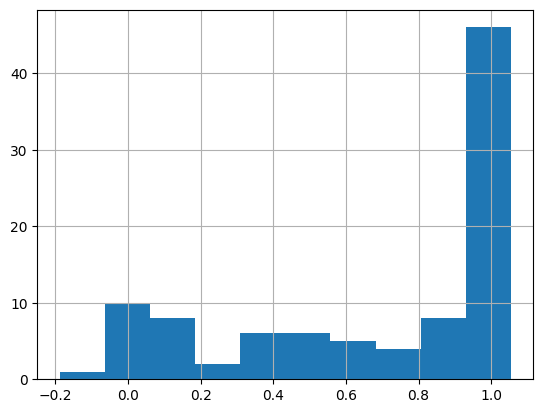

In [10]:
data.loc[:,'Function Score'].hist()

In [24]:
metadata = dict(uniprot_acc='O15118')
with open(dataset_path / 'metadata.json','w') as f:
    json.dump(metadata,f)